# WeatherPy
----

In [291]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import random
import json
import requests
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint
#from datetime import datetime
from api_keys import weather_api_key

### Generate Cities List

In [269]:
# Generate random latitude\longitude

latitude = []
longitude = []

for x in range (0,600):
    latitude.append(random.randint(-90,90))
    longitude.append(random.randint(-180,180)) 

In [270]:
# Select closest city using citipy library (https://pypi.python.org/pypi/citipy)

cities = []

for x,y in zip(latitude,longitude):
    city=citipy.nearest_city(x,y)  
    cities.append(city.city_name)


### Perform API Calls


In [271]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [272]:
# set up lists to hold reponse info

name = []
lat = []
lon = []
date = []
temp_max = []
hum = []
cloud = []
wind_kmh = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon']) 
        date.append(response['dt'])    
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_kmh.append(response['wind']['speed'])
        print(f"{city} found. Appending data")
        
    except:
       # Append null values
       print(f"{city} not found. Skipping...")
    pass

# Create city ID
city_id = []

for id in range(len(name)):
    city_id.append(id)


butaritari found. Appending data
ushuaia found. Appending data
yumen found. Appending data
qaanaaq found. Appending data
puerto ayora found. Appending data
tungor found. Appending data
saint george found. Appending data
iskateley found. Appending data
ushuaia found. Appending data
ponta do sol found. Appending data
ushuaia found. Appending data
verkhnyaya inta found. Appending data
upernavik found. Appending data
seoul found. Appending data
leningradskiy found. Appending data
haines junction found. Appending data
rikitea found. Appending data
port alfred found. Appending data
yinchuan found. Appending data
kamogawa found. Appending data
rikitea found. Appending data
hermanus found. Appending data
vila franca do campo found. Appending data
rikitea found. Appending data
bambous virieux found. Appending data
palabuhanratu not found. Skipping...
storsteinnes found. Appending data
damphu found. Appending data
cherskiy found. Appending data
hobart found. Appending data
cape town found. Appen

atuona found. Appending data
pangai found. Appending data
hobart found. Appending data
yumen found. Appending data
iqaluit found. Appending data
butaritari found. Appending data
nikolskoye found. Appending data
tuktoyaktuk found. Appending data
bubaque found. Appending data
videira found. Appending data
esperance found. Appending data
hermanus found. Appending data
hithadhoo found. Appending data
castro found. Appending data
jamestown found. Appending data
bambous virieux found. Appending data
cururupu found. Appending data
mitsamiouli found. Appending data
kodiak found. Appending data
ashford found. Appending data
barrow found. Appending data
busselton found. Appending data
hammerfest found. Appending data
saldanha found. Appending data
sorland found. Appending data
atuona found. Appending data
tuktoyaktuk found. Appending data
albany found. Appending data
tucuma found. Appending data
ferrol found. Appending data
punta arenas found. Appending data
turukhansk found. Appending data
new 

najran found. Appending data
jamestown found. Appending data
mahebourg found. Appending data
geraldton found. Appending data
geraldton found. Appending data
korla found. Appending data
atambua found. Appending data
bethel found. Appending data
suamico found. Appending data
pafos found. Appending data
atuona found. Appending data
victoria found. Appending data
bagdarin found. Appending data
saint-pierre found. Appending data
punta arenas found. Appending data
ribeira grande found. Appending data
barrow found. Appending data
richard toll not found. Skipping...
barrow found. Appending data
clervaux found. Appending data
rancho palos verdes found. Appending data
pundaguitan found. Appending data
nizhneyansk not found. Skipping...
bluff found. Appending data
kimbe found. Appending data
strezhevoy found. Appending data
taolanaro not found. Skipping...
chuy found. Appending data
meyungs not found. Skipping...
lasa found. Appending data
hilo found. Appending data
dunedin found. Appending data


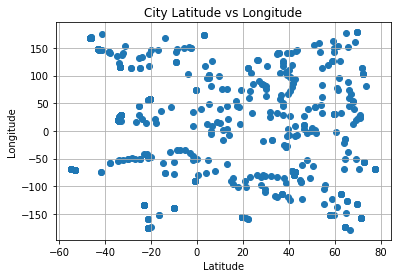

In [283]:
# Review how the sample cities are distributed

plt.scatter(weather_data["Latitude"], weather_data["Longitude"], marker="o")

plt.title("City Latitude vs Longitude")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

### Convert Raw Data to DataFrame


In [284]:
# create a data frame from cities, lat, and temp
weather_data = pd.DataFrame({"City_ID": city_id,
                            "City": name,
                            "Latitude": lat,
                            "Longitude": lon,
                            "Date": date,
                            "Max Temperature (C)": temp_max,
                            "Humidity": hum,
                            "Cloudiness": cloud,
                            "Wind Speed (km/h)": wind_kmh,
                            })

# Convert Unix date
weather_data["Date"]=pd.to_datetime(weather_data["Date"], unit='s')

# Export file as csv
weather_data.to_csv("output_data/cities.csv",index=False, header=True)

weather_data.head()

,City_ID,City,Latitude,Longitude,Date,Max Temperature (C),Humidity,Cloudiness,Wind Speed (km/h)
0,0,Butaritari,3.0707,172.7902,2021-03-17 14:19:15,26.64,79,88,5.91
1,1,Ushuaia,-54.8000,-68.3000,2021-03-17 14:19:39,10.00,66,0,6.69
2,2,Yumen,40.2833,97.2000,2021-03-17 14:19:40,5.89,15,94,5.77
3,3,Qaanaaq,77.4840,-69.3632,2021-03-17 14:19:40,-21.17,96,100,0.56
4,4,Puerto Ayora,-0.7393,-90.3518,2021-03-17 14:19:40,27.22,83,40,3.09


In [285]:
# Review data
weather_data.describe()

,City_ID,Latitude,Longitude,Max Temperature (C),Humidity,Cloudiness,Wind Speed (km/h)
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,9.766861,3.065597,11.988711,71.475499,47.116152,4.040889
std,159.204271,40.716995,104.872837,16.865488,19.260389,38.115102,2.900317
min,0.000000,-54.800000,-179.166700,-33.430000,7.000000,0.000000,0.350000
25%,137.500000,-25.166700,-79.235300,2.220000,63.000000,6.000000,1.830000
50%,275.000000,6.629200,15.381300,16.780000,73.000000,40.000000,3.600000
75%,412.500000,42.887500,100.335400,25.720000,85.000000,90.000000,5.140000
max,550.000000,77.484000,178.416700,42.250000,100.000000,100.000000,19.550000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

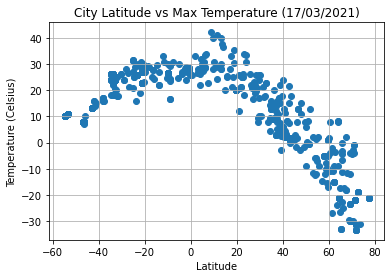

In [286]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature (C)"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Max Temperature ({current_date})")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Temperature.png")

# Show plot
plt.show()

#### Temparature Analysis
The Equator is at zero latitude, Southern Hemisphere is at negative latitude, and Northen Hemisphere is at positive latitude. As the city get closer to the Equator, the maximum temperature is warmer, especially if the city is also in the Southern Hemisphere. As the city get further away from the Equator and up toward the top of the Northern Hemisphere, the temperature will be at extreme cold level.  

## Latitude vs. Humidity Plot

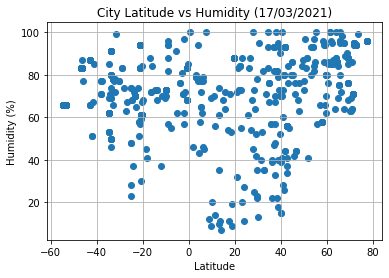

In [287]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Humidity ({current_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

#### Humidity Analysis
Some cities in the Northern Hemisphere have lower humidity % as they get closer to the Equator. The longitude may be another factor that influence the level of humidity too.  

## Latitude vs. Cloudiness Plot

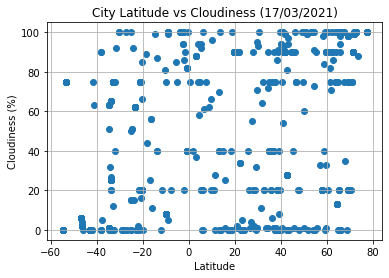

In [288]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Cloudiness ({current_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

#### Cloudiness Analysis
There is no distinct difference in term of cloudiness to make a solid conclusion.

## Latitude vs. Wind Speed Plot

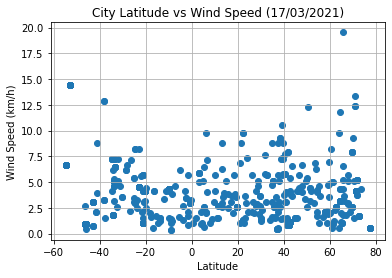

In [289]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (km/h)"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Wind Speed ({current_date})")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed.png")

# Show plot
plt.show()

#### Wind Speed Analysis
There is no distinct difference in term of wind speed to make a solid conclusion.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [303]:
# Create Northern Hemisphere dataframe
north_df = weather_data.loc[weather_data["Latitude"]>=0,:]

north_df.head()

,City_ID,City,Latitude,Longitude,Date,Max Temperature (C),Humidity,Cloudiness,Wind Speed (km/h)
0,0,Butaritari,3.0707,172.7902,2021-03-17 14:19:15,26.64,79,88,5.91
2,2,Yumen,40.2833,97.2000,2021-03-17 14:19:40,5.89,15,94,5.77
3,3,Qaanaaq,77.4840,-69.3632,2021-03-17 14:19:40,-21.17,96,100,0.56
5,5,Tungor,53.3808,142.9564,2021-03-17 14:19:40,-11.52,80,100,6.82
6,6,Saint George,37.1041,-113.5841,2021-03-17 14:19:40,2.78,93,1,0.45


In [ ]:
# Function to create linear regression

def lreg():
    

The r-value is: -0.9079135564000488


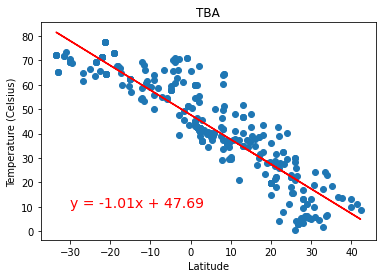

In [304]:
x_values=north_df["Max Temperature (C)"]
y_values=north_df["Latitude"]


#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,10),fontsize=14,color="red")

plt.title("TBA")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.46937863826630627


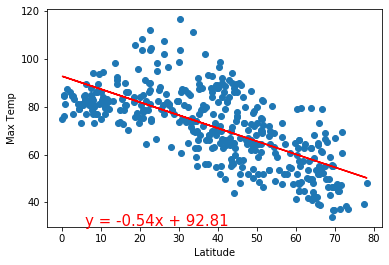

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


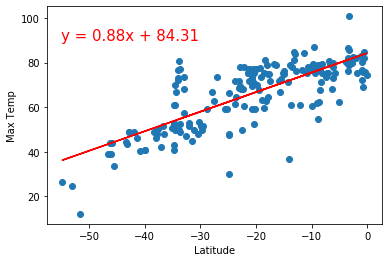

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


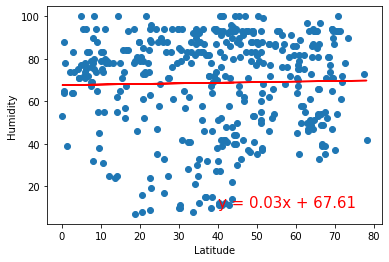

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


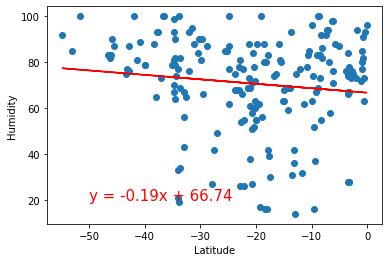

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


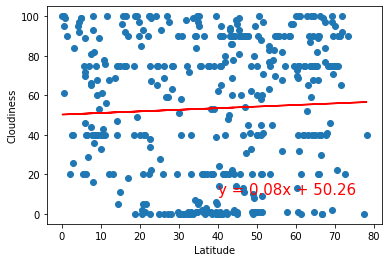

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


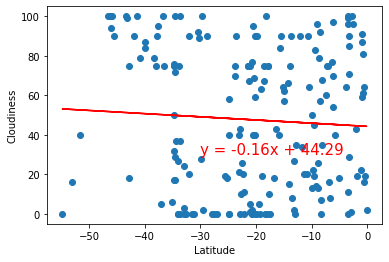

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


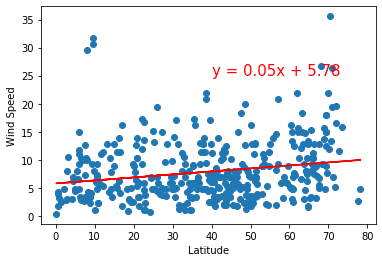

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


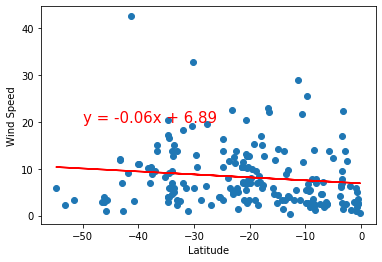